In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing

In [52]:
data = pd.read_csv('DIS_sent_news')

In [53]:
data['Date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [54]:
data['Date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [55]:
data = data.set_index('Date')

In [56]:
data = data.drop(['publication_date'], axis=1)

In [57]:
data[:100]

,compound,headline,neg,neu,pos,label
Date,,,,,,
2015-05-12 05:05:04,-0.1027,Insight - U.S. media CEOs are top paid even in...,0.138,0.750,0.113,-1
2015-08-04 22:46:43,-0.1027,Disney shares drop after company lowers cable ...,0.333,0.463,0.204,-1
2015-09-08 22:58:07,0.1027,Infosys says cleared in U.S. visa probe by Lab...,0.000,0.865,0.135,1
2015-09-09 02:39:40,0.1027,Infosys says cleared in U.S. visa probe by Lab...,0.000,0.865,0.135,1
2015-10-21 16:03:16,0.0000,Disney's ESPN to eliminate over 300 positions ...,0.000,1.000,0.000,0
2015-12-22 23:43:52,0.0000,Disney in talks with Univision to exit Fusion ...,0.000,1.000,0.000,0
2016-03-09 02:55:50,-0.3182,Disney announces $75 mn loss on 'The Finest Ho...,0.223,0.777,0.000,-1
2016-04-04 21:19:03,-0.3182,Disney CEO frontrunner Thomas Staggs resigns,0.315,0.685,0.000,-1
2016-04-24 19:08:08,0.0000,'The Jungle Book' bests 'Huntsman' at the US b...,0.000,1.000,0.000,0


In [58]:
news_daily = data.resample('D').mean()

In [59]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [60]:
news_daily.fillna(0, inplace=True)
news_daily[:100]

,compound,neg,neu,pos,label
Date,,,,,
2015-05-12,-0.1027,0.138,0.750,0.113,-1.0
2015-05-13,0.0000,0.000,0.000,0.000,0.0
2015-05-14,0.0000,0.000,0.000,0.000,0.0
2015-05-15,0.0000,0.000,0.000,0.000,0.0
2015-05-16,0.0000,0.000,0.000,0.000,0.0
2015-05-17,0.0000,0.000,0.000,0.000,0.0
2015-05-18,0.0000,0.000,0.000,0.000,0.0
2015-05-19,0.0000,0.000,0.000,0.000,0.0
2015-05-20,0.0000,0.000,0.000,0.000,0.0


In [61]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
Date,,,,,
2016-07-01,0.000,0.0,0.0000,0.0000,0.0
2016-07-02,0.000,0.0,0.0000,0.0000,0.0
2016-07-03,0.000,0.0,0.0000,0.0000,0.0
2016-07-04,0.000,0.0,0.0000,0.0000,0.0
2016-07-05,0.148,0.0,0.9695,0.0305,0.5


### Price analysis

In [62]:
df_price = pd.read_csv('disney_prices')

In [63]:
df_price['Date']= df_price['date']
df_price['Date']=pd.to_datetime(df_price.Date,format='%Y-%m-%d')
df_price.index =df_price['Date']

In [64]:
df_price = df_price.drop(['date'], axis=1)

In [65]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,Date
Date,,,,,,,,,,,,,,
2019-07-09,0,141.61000,141.720000,139.750000,140.060000,7225609.0,141.61,daily,141.72,False,139.7500,140.06,7396283.0,2019-07-09
2019-07-08,1,141.02000,142.230000,140.970000,142.180000,4993865.0,141.02,daily,142.23,False,140.9700,142.18,4993865.0,2019-07-08
2019-07-05,2,142.45000,142.890000,140.700000,141.420000,5595988.0,142.45,daily,142.89,False,140.7000,141.42,5595988.0,2019-07-05
2019-07-03,3,142.10000,142.119877,141.126727,141.821723,4150852.0,142.98,daily,143.00,False,142.0007,142.70,4150852.0,2019-07-03
2019-07-02,4,141.65277,141.980739,140.400226,140.529724,7557314.0,142.53,daily,142.86,False,141.2697,141.40,7557314.0,2019-07-02


In [66]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-07-09 to 2015-07-20
Data columns (total 14 columns):
Unnamed: 0     1000 non-null int64
adj_close      1000 non-null float64
adj_high       1000 non-null float64
adj_low        1000 non-null float64
adj_open       1000 non-null float64
adj_volume     1000 non-null float64
close          1000 non-null float64
frequency      1000 non-null object
high           1000 non-null float64
intraperiod    1000 non-null bool
low            1000 non-null float64
open           1000 non-null float64
volume         1000 non-null float64
Date           1000 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 110.4+ KB


In [67]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [68]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,Date
Date,,,,,,,,,,,,,,
2019-07-01,5,140.778186,141.076339,138.363142,139.585571,8996454.0,141.65,daily,141.95,False,139.2200,140.45,8996454.0,2019-07-01
2019-06-28,6,138.780557,139.347049,137.756896,138.551972,20078800.0,139.64,daily,140.21,False,138.6100,139.41,20078800.0,2019-06-28
2019-06-27,7,138.442649,140.867632,138.064988,140.132186,6466261.0,139.30,daily,141.74,False,138.9200,141.00,6466261.0,2019-06-27
2019-06-26,8,139.535879,139.873787,138.652251,139.496125,8842136.0,140.40,daily,140.74,False,139.5109,140.36,8842136.0,2019-06-26
2019-06-25,9,139.078710,139.545818,137.816527,138.164373,14675355.0,139.94,daily,140.41,False,138.6700,139.02,14675355.0,2019-06-25


In [69]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [70]:
df_price.tail()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,Date,compound
Date,,,,,,,,,,,,,,,
2016-07-08,754,95.235728,95.455606,94.423137,94.882012,6045805.0,99.62,daily,99.85,False,98.770,99.25,6045805.0,2016-07-08,0.000
2016-07-07,755,94.078980,94.145900,93.285509,93.333308,5146032.0,98.41,daily,98.48,False,97.580,97.63,5146032.0,2016-07-07,0.000
2016-07-06,756,93.438467,93.504904,91.834495,92.062278,6223292.0,98.45,daily,98.52,False,96.760,97.00,6223292.0,2016-07-06,0.000
2016-07-05,757,92.688681,93.011374,92.218879,92.793082,5846412.0,97.66,daily,98.00,False,97.165,97.77,5846412.0,2016-07-05,0.148
2016-07-01,758,93.039847,93.618795,92.736136,92.774100,5681627.0,98.03,daily,98.64,False,97.710,97.75,5681627.0,2016-07-01,0.000


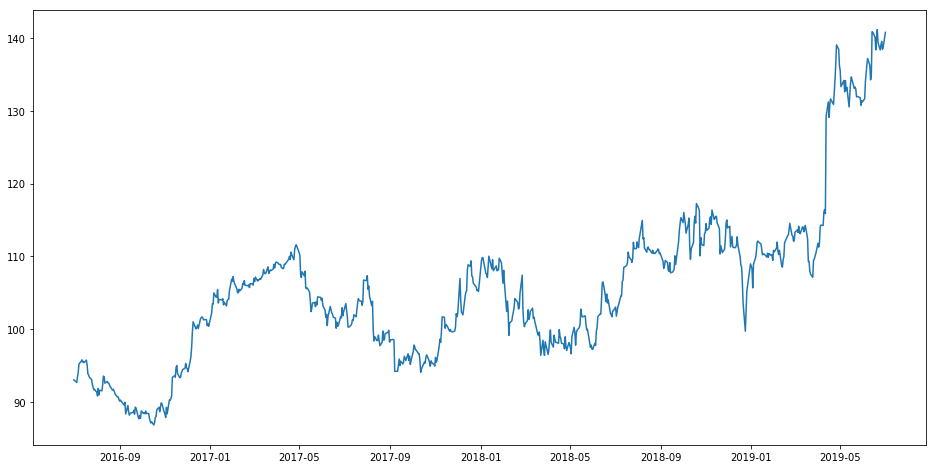

In [71]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

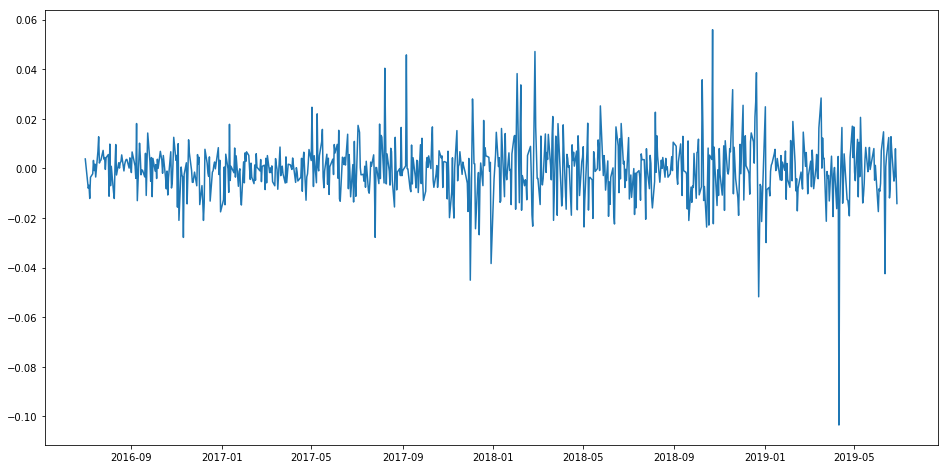

In [74]:
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'].pct_change(), label='Close Price history')

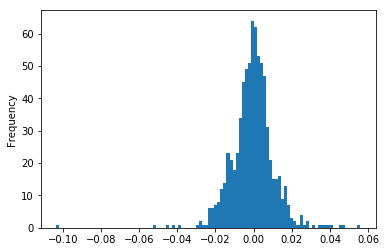

In [75]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

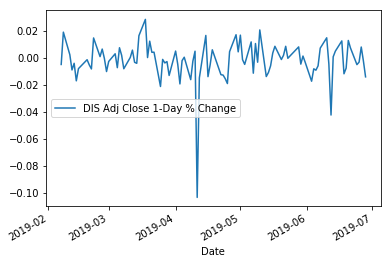

In [76]:
df_price['adj_close'][:100].pct_change().plot(label='DIS Adj Close 1-Day % Change',legend=True)

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000            -0.030807
1d_close_future_pct     -0.030807             1.000000


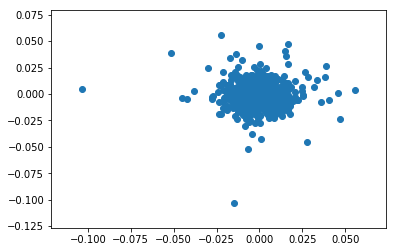

In [77]:
# Create 1-day % changes of Adj_Close for the current day, and 1 days in the future
df_price['1d_future_close'] = df_price['adj_close'].shift(-1)
df_price['1d_close_future_pct'] = df_price['1d_future_close'].pct_change(1)
df_price['1d_close_pct'] = df_price['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 1d close pecentage changes (current and future)
corr = df_price[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 1-day percent change vs the future 5-day percent change
plt.scatter(df_price['1d_close_pct'], df_price['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000            -0.072551
1d_close_future_pct -0.072551             1.000000


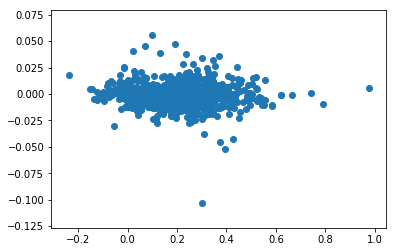

In [80]:
# Calculate the correlation matrix between the 1d close pecentage changes (current and future)
corr = df_price[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 1-day percent change vs the future 1-day percent change
plt.scatter(df_price['compound'], df_price['1d_close_future_pct'])
plt.show()

In [81]:
import talib

In [82]:
feature_names = ['1d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
feature_names = feature_names + ['compound']
print(feature_names)

['1d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound']


In [83]:
df1 = df_price.copy()

In [84]:
#df1.join(df123['compound'],how='right')

In [86]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['1d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['1d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     1d_close_future_pct  1d_close_pct      ma14     rsi14  \
1d_close_future_pct             1.000000     -0.046756  0.053675 -0.015342   
1d_close_pct                   -0.046756      1.000000 -0.445968  0.335735   
ma14                            0.053675     -0.445968  1.000000 -0.853304   
rsi14                          -0.015342      0.335735 -0.853304  1.000000   
ma30                            0.013994     -0.324343  0.871118 -0.954208   
rsi30                          -0.005163      0.235926 -0.684010  0.909811   
ma50                           -0.000417     -0.247359  0.734041 -0.924319   
rsi50                          -0.014145      0.182067 -0.551635  0.769015   
ma200                           0.059118     -0.109383  0.334129 -0.470092   
rsi200                         -0.041585      0.083447 -0.271843  0.392551   
compound                       -0.079924     -0.008274 -0.026894  0.073909   

                         ma30     rsi30      ma50     rsi50    

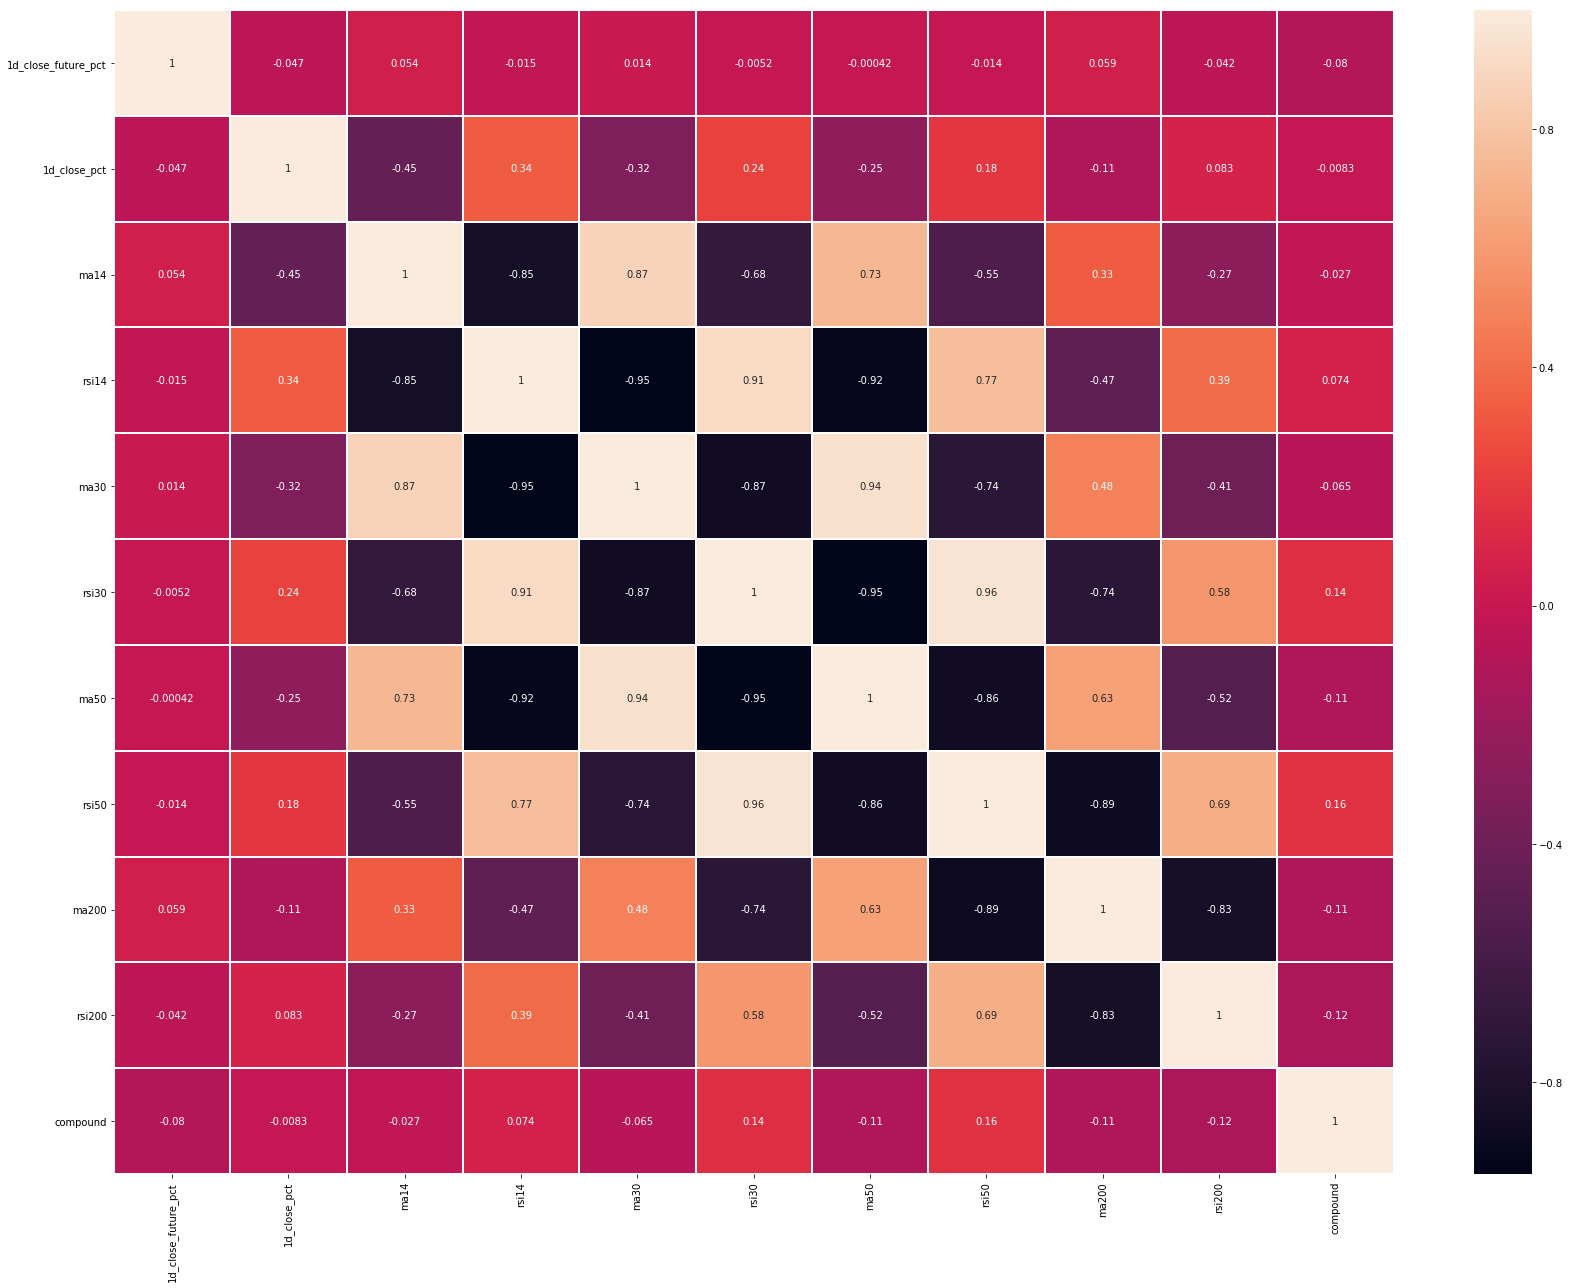

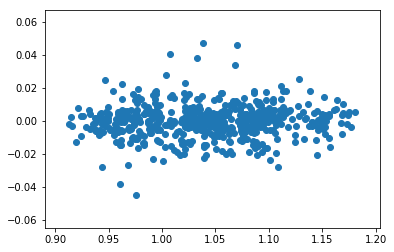

In [88]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df_price['ma200'], df_price['1d_close_future_pct'])
plt.show()

In [89]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(553, 11) (442, 11) (111, 11)
(553, 11) (442, 11) (111, 11)


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [91]:
calculate_vif_(train_features,thresh=100)

dropping 'const' at index: 0
Remaining variables:
Index(['1d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'compound'],
      dtype='object')


,1d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,compound
Date,,,,,,,,,,
2018-09-12,-0.010933,1.025110,38.842916,1.042661,44.001827,1.047183,45.331556,1.092733,43.002691,0.493250
2018-09-11,0.001279,1.019473,39.400962,1.038820,44.221357,1.045431,45.459617,1.089917,43.036386,0.233260
2018-09-10,0.009854,1.005486,43.671030,1.026397,45.913462,1.034373,46.447106,1.077940,43.296280,0.456314
2018-09-07,0.002620,0.999594,44.795893,1.021333,46.365424,1.030729,46.711466,1.073748,43.366011,0.085325
2018-09-06,-0.006398,1.002824,42.555283,1.026120,45.404487,1.036124,46.142420,1.079267,43.235186,0.204253
2018-09-05,-0.003537,1.003940,41.332333,1.027560,44.875988,1.038482,45.829488,1.081713,43.163301,0.486286
2018-09-04,0.008920,0.993827,45.565593,1.016870,46.494908,1.028218,46.755379,1.070776,43.400957,0.455937
2018-08-31,0.010555,0.984480,50.186894,1.005826,48.367698,1.016643,47.841446,1.058204,43.683504,0.274133
2018-08-30,-0.000893,0.985551,49.797760,1.006520,48.218472,1.016465,47.756488,1.057805,43.664780,0.202340


In [92]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     1d_close_future_pct   R-squared:                       0.059
Model:                             OLS   Adj. R-squared:                  0.037
Method:                  Least Squares   F-statistic:                     2.685
Date:                 Wed, 17 Jul 2019   Prob (F-statistic):            0.00337
Time:                         16:21:47   Log-Likelihood:                 1401.1
No. Observations:                  442   AIC:                            -2780.
Df Residuals:                      431   BIC:                            -2735.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2831      0.139    

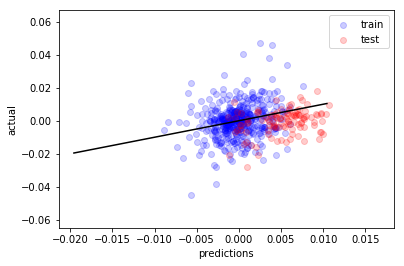

In [93]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

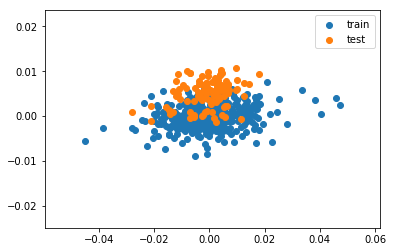

In [94]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

In [95]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.058641309036768785
-0.4987348013520083


### Feature Engineering

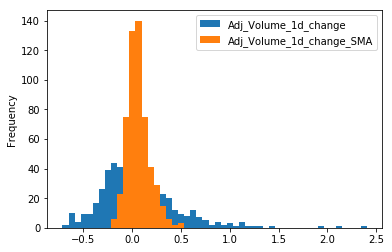

In [96]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)

# Plot histogram of volume % change data
df_price[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [97]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df_price.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = df_price.index

# Join the dataframe with the days of week DataFrame
df_price = pd.concat([df_price, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
df_price.dropna(inplace=True)  # drop missing values in-place
print(df_price.head())

            Unnamed: 0   adj_close    adj_high     adj_low    adj_open  \
Date                                                                     
2018-09-05         210  108.353316  109.290202  108.185663  109.053515   
2018-09-04         211  109.319788  110.453913  109.122549  110.256674   
2018-08-31         212  110.473637  110.730047  110.019987  110.355293   
2018-08-30         213  110.375017  110.863184  110.049572  110.522946   
2018-08-29         214  110.897701  111.163974  110.473637  111.025906   

            adj_volume   close frequency     high  intraperiod    ...      \
Date                                                              ...       
2018-09-05   6388627.0  109.87     daily  110.820        False    ...       
2018-09-04   6391228.0  110.85     daily  112.000        False    ...       
2018-08-31   4642826.0  112.02     daily  112.280        False    ...       
2018-08-30   3481754.0  111.92     daily  112.415        False    ...       
2018-08-29   400149

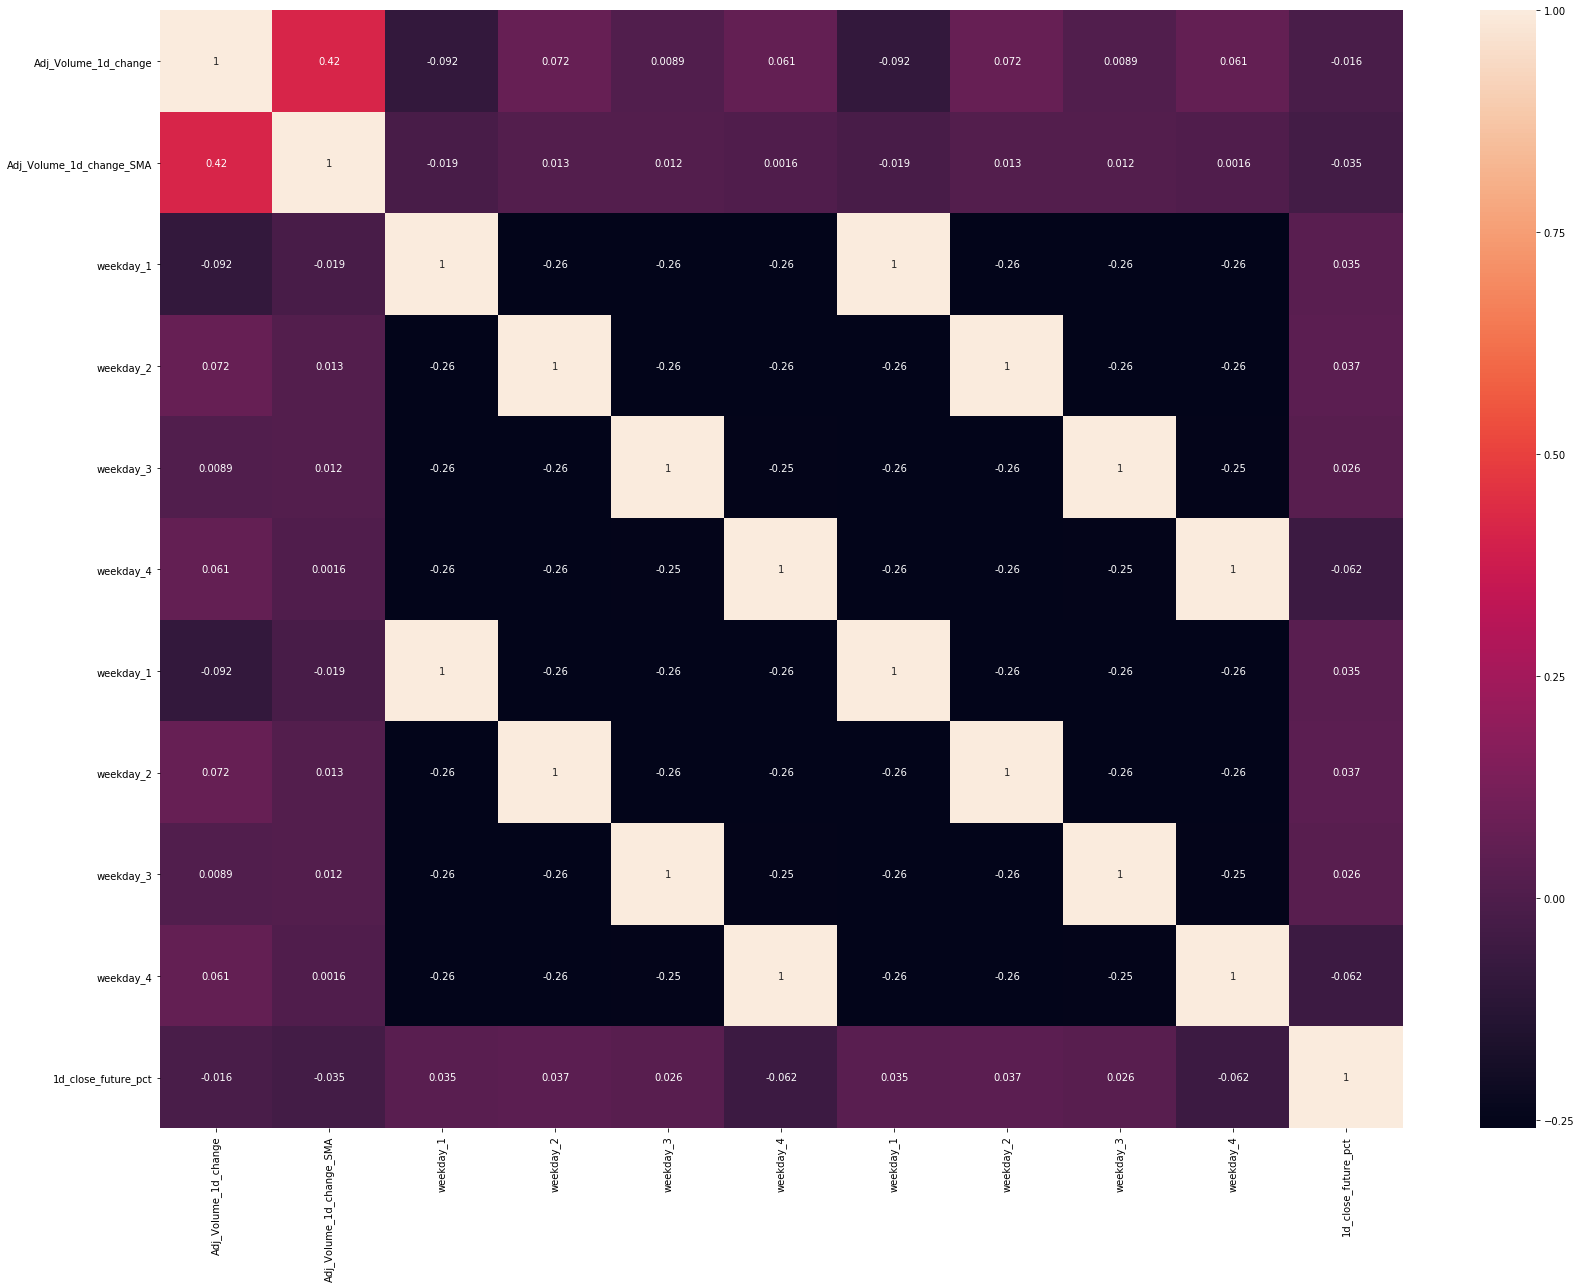

In [99]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])
plt.figure(figsize=(24, 18))
# Plot the correlations between the new features and the targets
sns.heatmap(df_price[new_features + ['1d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999226183250983
-3.0565658960876325


In [101]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.08463774792300081
-1.5973558622019621 

max_depth= 5
0.20738698084811447
-1.2161442924348647 

max_depth= 10
0.5652593416087508
-2.2027007183104894 



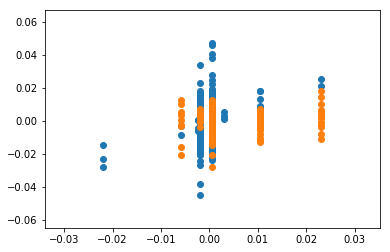

In [102]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.8589180314780455
-0.7978214498444528


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [104]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.14370246859916946 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


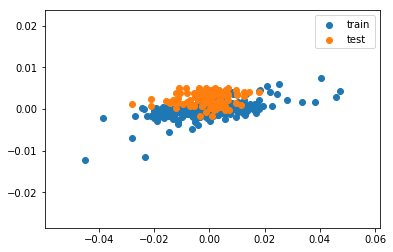

In [105]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

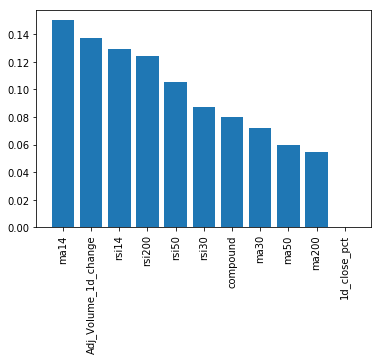

In [106]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.24572283902813996
-0.32008438130498273


ValueError: shape mismatch: objects cannot be broadcast to a single shape

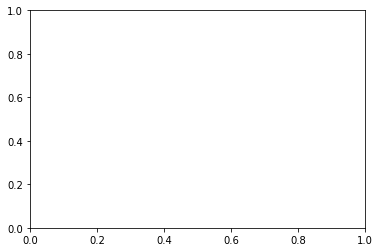

In [108]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

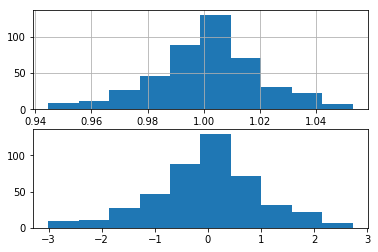

In [109]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [110]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.493859030940047
-0.9323616624527638

n_neighbors = 3
train, test scores
0.30147854601098956
-0.6450792534348381

n_neighbors = 4
train, test scores
0.20557513532946647
-0.4727956913125058

n_neighbors = 5
train, test scores
0.14643440835620336
-0.28412236564255067

n_neighbors = 6
train, test scores
0.10556852683771123
-0.24430379303151173

n_neighbors = 7
train, test scores
0.09742092963807858
-0.24436296828721482

n_neighbors = 8
train, test scores
0.07432748149448243
-0.2618554846472416

n_neighbors = 9
train, test scores
0.06391802496936749
-0.25418063774928834

n_neighbors = 10
train, test scores
0.04606312033777005
-0.23145209809483602

n_neighbors = 11
train, test scores
0.03501548375523145
-0.18204975138831303

n_neighbors = 12
train, test scores
0.024678075470481398
-0.1352597030385012



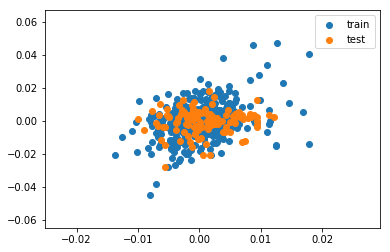

In [111]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [112]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
442/442 [==============================] - 0s 360us/step - loss: 0.0119
Epoch 2/25
442/442 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 3/25
442/442 [==============================] - 0s 22us/step - loss: 0.0016
Epoch 4/25
442/442 [==============================] - 0s 33us/step - loss: 9.2132e-04
Epoch 5/25
442/442 [==============================] - 0s 23us/step - loss: 6.7978e-04
Epoch 6/25
442/442 [==============================] - 0s 22us/step - loss: 5.8463e-04
Epoch 7/25
442/442 [==============================] - 0s 25us/step - loss: 5.2639e-04
Epoch 8/25
442/442 [==============================] - 0s 24us/step - loss: 4.6050e-04
Epoch 9/25
442/442 [==============================] - 0s 21us/step - loss: 4.3357e-04
Epoch 10/25
442/442 [==============================] - 0s 25us/step - loss: 3.9527e-04
Epoch 11/25
442/442 [==============================] - 0s 23us/step - loss: 3.5065e-04
Epoch 12/25
442/442 [==============================] - 0s 21us/

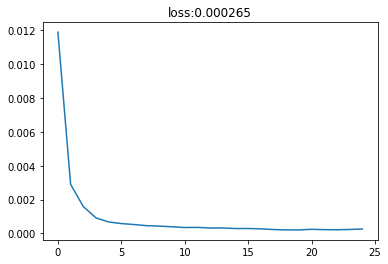

In [113]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-1.5481287408136648
-6.344291049958495


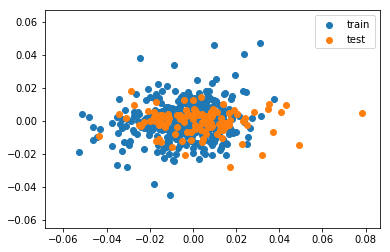

In [114]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [115]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c41bb2bf8>


Epoch 1/25
442/442 [==============================] - 0s 396us/step - loss: 0.3421
Epoch 2/25
442/442 [==============================] - 0s 23us/step - loss: 0.1160
Epoch 3/25
442/442 [==============================] - 0s 24us/step - loss: 0.0577
Epoch 4/25
442/442 [==============================] - 0s 34us/step - loss: 0.0374
Epoch 5/25
442/442 [==============================] - 0s 29us/step - loss: 0.0308
Epoch 6/25
442/442 [==============================] - 0s 29us/step - loss: 0.0268
Epoch 7/25
442/442 [==============================] - 0s 25us/step - loss: 0.0203
Epoch 8/25
442/442 [==============================] - 0s 24us/step - loss: 0.0163
Epoch 9/25
442/442 [==============================] - 0s 28us/step - loss: 0.0151
Epoch 10/25
442/442 [==============================] - 0s 23us/step - loss: 0.0142
Epoch 11/25
442/442 [==============================] - 0s 22us/step - loss: 0.0174
Epoch 12/25
442/442 [==============================] - 0s 29us/step - loss: 0.0142
Epoch 13/25


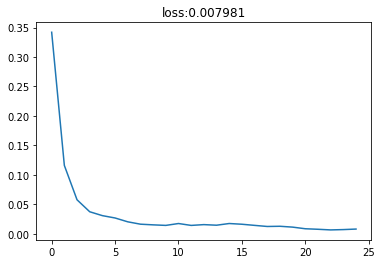

In [116]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-0.23396848530232517
-1.754101219267611


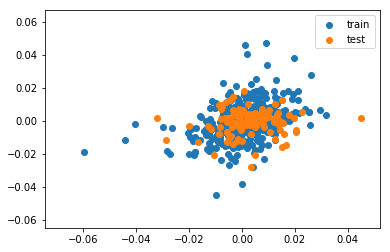

In [117]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
442/442 [==============================] - 0s 521us/step - loss: 0.0444
Epoch 2/25
442/442 [==============================] - 0s 33us/step - loss: 0.0231
Epoch 3/25
442/442 [==============================] - 0s 24us/step - loss: 0.0119
Epoch 4/25
442/442 [==============================] - 0s 24us/step - loss: 0.0103
Epoch 5/25
442/442 [==============================] - 0s 30us/step - loss: 0.0098
Epoch 6/25
442/442 [==============================] - 0s 24us/step - loss: 0.0078
Epoch 7/25
442/442 [==============================] - 0s 28us/step - loss: 0.0054
Epoch 8/25
442/442 [==============================] - 0s 26us/step - loss: 0.0047
Epoch 9/25
442/442 [==============================] - 0s 27us/step - loss: 0.0036
Epoch 10/25
442/442 [==============================] - 0s 29us/step - loss: 0.0034
Epoch 11/25
442/442 [==============================] - 0s 24us/step - loss: 0.0024
Epoch 12/25
442/442 [==============================] - 0s 24us/step - loss: 0.0024
Epoch 13/25


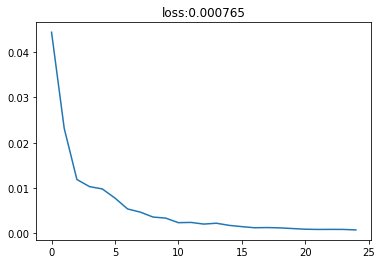

In [118]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [119]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.00718642 -0.00480751  0.00113881  0.00409801  0.01152146]


-0.14360406649055224
-0.9918213226430155


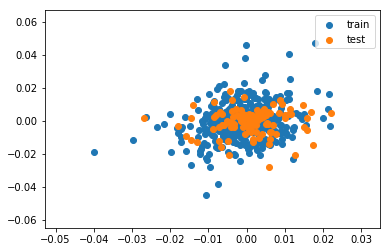

In [120]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()